## Data Pre-processing for Kuala Krai dataset

I inspect the dataframe for:
1. missing values
2. convert data types
3. remove unnecessary column
4. identify unique value
5. remove characters
6. provide descriptive/summary statistics
7. visualize data
8. measure correlation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
water_level = pd.read_csv('JPS WL data-kkrai.csv')  
water_level.head(3)

,Date,Time,Stage m
0,1/1/2010,24:00:00,17.06
1,2/1/2010,24:00:00,17
2,3/1/2010,24:00:00,17.31


In [3]:
len(water_level)

3500

In [4]:
# remove Time column
water_level.drop(['Time'], axis=1, inplace=True)
water_level.head(3)

,Date,Stage m
0,1/1/2010,17.06
1,2/1/2010,17
2,3/1/2010,17.31


In [5]:
#check for data types
water_level.dtypes

Date       object
Stage m    object
dtype: object

In [6]:
# check for unique value
water_level['Stage m'].unique()

array(['17.06', '17', '17.31', '18.6', '18.15', '17.4', '17.46', '17.71',
       '17.35', '17.01', '16.75', '16.65', '16.54', '16.52', '16.44',
       '16.39', '16.31', '16.25', '16.2', '16.16', '16.58', '17.2',
       '16.62', '16.46', '17.03', '17.1', '16.49', '16.17', '16.07',
       '16.01', '15.99', '15.96', '15.98', '15.87', '15.82', '15.9',
       '15.83', '15.78', '15.76', '15.71', '15.73', '15.67', '15.62',
       '15.69', '15.85', '15.68', '15.79', '15.86', '15.64', '15.53',
       '15.49', '15.46', '15.42', '15.4', '15.36', '15.3', '15.31',
       '15.29', '15.27', '15.32', '15.41', '15.43', '15.37', '15.35',
       '15.38', '15.39', '15.56', '15.72', '15.59', '15.45', '15.48',
       '15.61', '15.33', '15.24', '15.21', '15.18', '15.19', '15.22',
       '15.95', '15.47', '15.65', '15.28', '15.15', '15.2', '15.17',
       '15.8', '15.74', '15.91', '15.5', '15.57', '15.55', '15.34',
       '16.05', '16.32', '16.06', '16.82', '17.13', '16.76', '17.63',
       '18.1', '17.36', '

In [7]:
# remove special characters
water_level['Stage m'] = water_level['Stage m'].str.replace('#','').astype(float)

In [8]:
#convert data types for Stage variable
water_level['Stage m'] = pd.to_numeric(water_level['Stage m'])
water_level.dtypes

Date        object
Stage m    float64
dtype: object

In [9]:
# check for missing values
water_level.isna().sum()

Date       1
Stage m    1
dtype: int64

In [10]:
# remove last row
water_level.drop(water_level.tail(1).index, inplace=True)
water_level

,Date,Stage m
0,1/1/2010,17.06
1,2/1/2010,17.00
2,3/1/2010,17.31
3,4/1/2010,18.60
4,5/1/2010,18.15
...,...,...
3494,27/07/2019,15.56
3495,28/07/2019,15.86
3496,29/07/2019,15.97
3497,30/07/2019,15.72


In [11]:
# check missing values again
water_level.isnull().sum()

Date       0
Stage m    0
dtype: int64

In [12]:
# convert to datetime
from datetime import datetime
water_level['Date'] = pd.to_datetime(water_level['Date'])

In [13]:
# set date as index
water_level.set_index('Date', inplace=True)
water_level

,Stage m
Date,
2010-01-01,17.06
2010-02-01,17.00
2010-03-01,17.31
2010-04-01,18.60
2010-05-01,18.15
...,...
2019-07-27,15.56
2019-07-28,15.86
2019-07-29,15.97


In [14]:
water_level.describe()

,Stage m
count,3499.000000
mean,16.638231
std,1.582909
min,1.680000
25%,15.830000
50%,16.380000
75%,17.120000
max,33.930000


In [15]:
water_level.median()

Stage m    16.38
dtype: float64

In [16]:
#saving cleaned data
water_level.to_csv('cleaned-JPS WL data-kbharu.csv')

## Data visualization

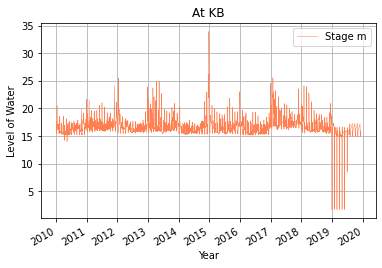

In [17]:
#plot the time series of water level 
plt.style.use('seaborn-deep')
ax = water_level.plot(color='coral', grid=True, linewidth=0.5)
ax.set_xlabel('Year')
ax.set_ylabel('Level of Water')
ax.set_title('At KB')
plt.show()

<AxesSubplot:ylabel='Frequency'>

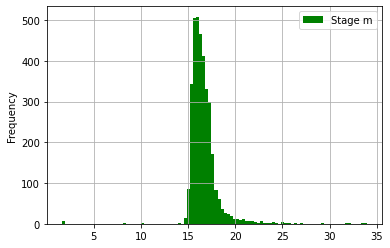

In [18]:
#plot the histogram
water_level.plot(kind='hist', bins=100, color='green', grid=True)

<AxesSubplot:ylabel='Density'>

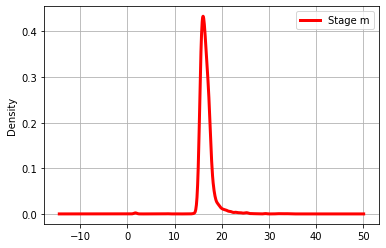

In [19]:
# kernel density plot
water_level.plot(kind='density', color="red", grid=True, linewidth=3, fontsize=10)

<Figure size 432x216 with 0 Axes>

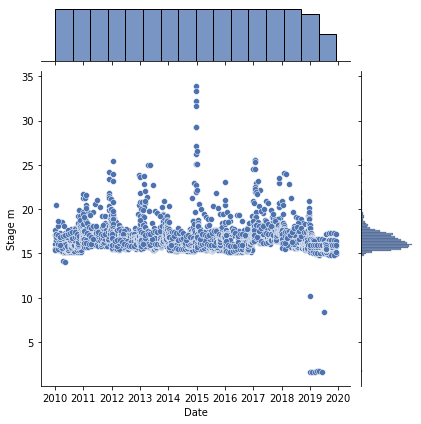

In [20]:
#scatter plot with marginal histograms
import seaborn as sns

plt.figure(figsize=(6, 3))
sns.jointplot(
    x="Date", y="Stage m",
    edgecolor="white",
    data=water_level
)
plt.xlabel("Date")
plt.ylabel("Stage m");

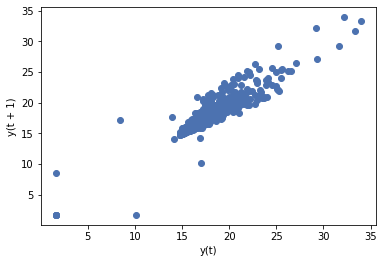

In [21]:
# lag plot
from pandas.plotting import lag_plot

lag_plot(water_level)
plt.show()

The plot above shows the water level data on the y(t) against its previous time step, prior month, the the y(t+1). It is assume that the relationship is positive.


In [22]:
# Autocorrelation
autocorrelation = water_level['Stage m'].autocorr()
print("The autocorrelation is: %4.2f" %(autocorrelation))

The autocorrelation is: 0.94


The correlation between the water level data and its lag variable by a time step shows a high correlation at 0.93. This indicates that there is a substantial, positive relationship.

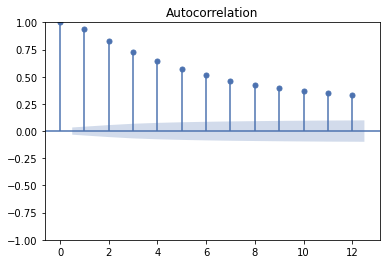

In [23]:
# Plot ACF to visualize the autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(water_level['Stage m'], lags=12);

The partial autocorrelation function (PACF) gives the partial correlation of a time series with its own lagged values.

Value of partial autocorrelation that are close to 0 indicates that there is no correlation between observations values and lagged values. On the other hand, value close to 1 or -1 shows that correlations are in strong positive or negative between the lagged observations of the time series.